# 2. Data Analysis

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams['font.size'] = 12
plt.rcParams['legend.frameon'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

In [4]:
%config InlineBackend.figure_format = 'retina'

## Data Correlations

Let's load in the pull Maddison project data. Here we let `mpd0` be the long form data.

In [25]:
mpd0 = pd.read_excel('data/mpd2018.xlsx', sheet_name='Full data', usecols=usecols)
mpd0 = mpd0[['year', 'countrycode', 'cgdppc', 'rgdpnapc', 'pop']]

Now let's `pivot` the data into wide form and store it in `mpd`.

In [26]:
mpd = mpd0.pivot('year', 'countrycode')

Here we plot log GDP per capita for a sample of countries (USA, China, and Japan)

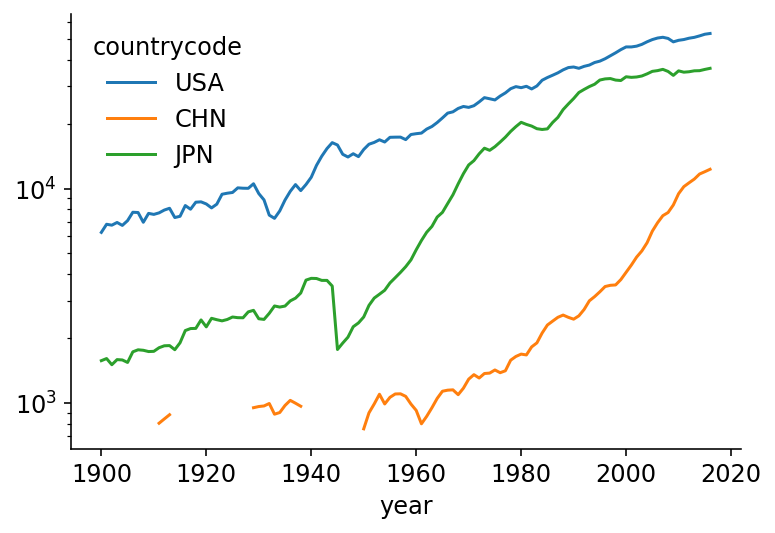

In [27]:
mpd['cgdppc'].loc[1900:, ['USA', 'CHN', 'JPN']].plot(logy=True);

It's often useful to study bivariate relationships. This tells us what kinds of correlations exist between the two variables, though it doesn't necessarily mean one is causing the other.

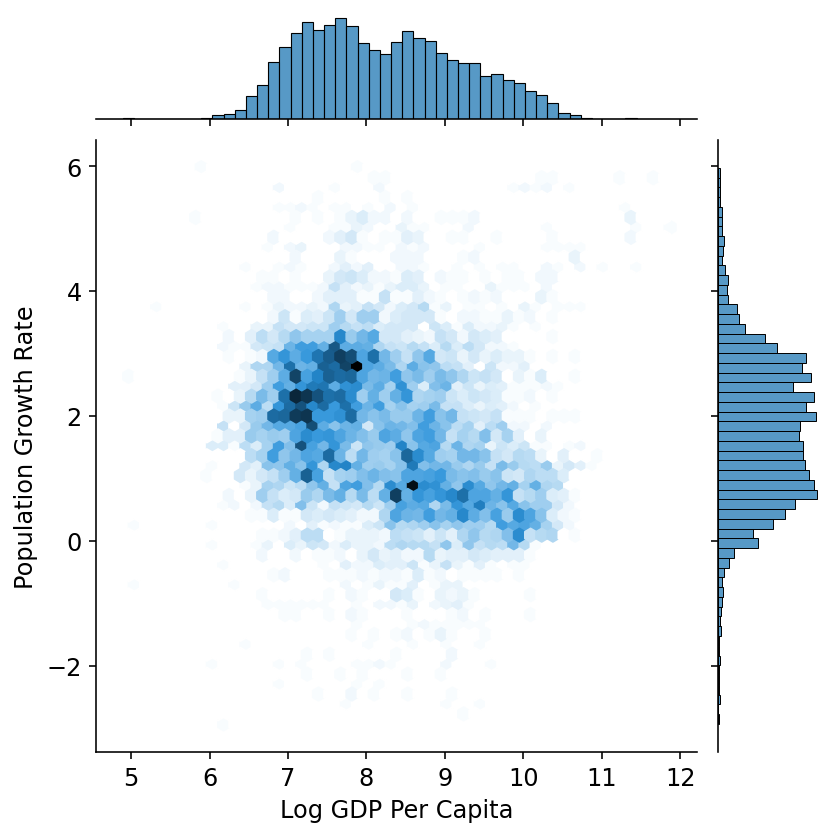

In [28]:
# create a new copy of the data
mpd1 = mpd0.copy()

# generate our two variables of interest
mpd1['pop_growth'] = 100*np.log(mpd1['pop']).diff()
mpd1['log_cgdppc'] = np.log(mpd1['cgdppc'])

# remove outliers and missing data and focus on 20th century
mpd1 = mpd1.query('pop_growth > -3 and pop_growth < 6')
mpd1 = mpd1.query('year >= 1900 and year < 2000')
mpd1 = mpd1[['pop_growth', 'log_cgdppc']].dropna()

# remove missing data and plot
ax = sns.jointplot('log_cgdppc', 'pop_growth', kind='hex', data=mpd1)
ax.set_axis_labels(xlabel='Log GDP Per Capita', ylabel='Population Growth Rate');